In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install torch torch-geometric pandas networkx scikit-learn kaggle


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# 1️⃣ EDA : Data Exploration

In [3]:
df = pd.read_csv("/kaggle/input/iot-sdn-ids-dataset/dataset.csv")

In [4]:
target_column = "Label"
df_sampled = df.groupby(target_column, group_keys=False).apply(lambda x: x.sample(frac=0.07, random_state=42))
df = df_sampled.reset_index(drop=True)

<ipython-input-4-d4edc7d4e3c0>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby(target_column, group_keys=False).apply(lambda x: x.sample(frac=0.07, random_state=42))


In [5]:
df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,319810,57,39721.359934,534,80.000000,6.0,3615,1.000000e+01,1.0,2.000000,...,32.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Botnet
1,319824,57,44740.644974,534,80.000000,6.0,3625,6.018851e+02,10.0,9.000000,...,32.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Botnet
2,319795,61,80.000000,530,33290.230412,6.0,3625,3.304059e+02,1.0,1.000000,...,32.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Botnet
3,319820,57,43407.768421,534,80.000000,6.0,3616,9.702590e+02,10.0,9.000000,...,32.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Botnet
4,319819,61,80.000000,530,43014.934245,6.0,3615,6.216134e+02,1.0,1.000000,...,32.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Botnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311996,501239,8288,50552.813097,2682,53.000000,17.0,543,9.134771e+03,1.0,1.000000,...,8.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Web-Attack
311997,285122,58,59824.000000,530,2602.712505,6.0,496,1.000000e+01,2.0,2.000000,...,24.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Web-Attack
311998,318077,58,59824.000000,530,9621.289848,6.0,496,1.000000e+01,2.0,2.000000,...,24.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Web-Attack
311999,319243,58,59824.000000,530,9881.978336,6.0,496,9.000000e+00,2.0,2.000000,...,24.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Web-Attack


In [6]:
df.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE 

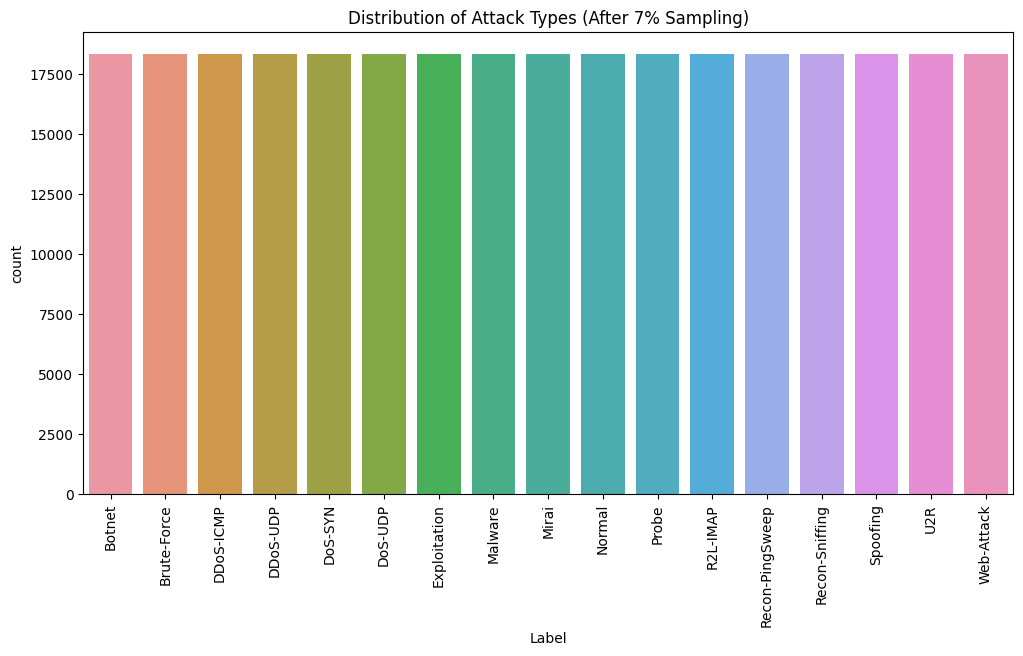

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(x=df['Label'], order=df['Label'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Attack Types (After 7% Sampling)')
plt.show()

In [8]:
df.Label.unique()

array(['Botnet', 'Brute-Force', 'DDoS-ICMP', 'DDoS-UDP', 'DoS-SYN',
       'DoS-UDP', 'Exploitation', 'Malware', 'Mirai', 'Normal', 'Probe',
       'R2L-IMAP', 'Recon-PingSweep', 'Recon-Sniffing', 'Spoofing', 'U2R',
       'Web-Attack'], dtype=object)

In [9]:
import torch
import torch.nn.functional as F
import pandas as pd
import numpy as np
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import radius_neighbors_graph
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm


# 2️⃣ Data Preprocessing

In [10]:
features = df.drop(columns=[target_column])
targets = df[target_column]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(targets)


scaler = StandardScaler()
x = scaler.fit_transform(features)

# 3️⃣ Connect each node to its 5 most similar flows                  (based on their features) using KNN

In [11]:
k = 5  # Drastically limits edges per node

nbrs = NearestNeighbors(n_neighbors=k, algorithm="ball_tree").fit(x)
adj = nbrs.kneighbors_graph(x, mode="connectivity")

# Convert COO sparse matrix to edge_index directly
edge_index = torch.tensor(adj.nonzero(), dtype=torch.long)


<ipython-input-11-e6a0921a3113>:7: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  edge_index = torch.tensor(adj.nonzero(), dtype=torch.long)


# 4️⃣ Create PyTorch Geometric Data object

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data = data.to(device)

data = Data(
    x=torch.tensor(x, dtype=torch.float32),
    edge_index=edge_index,
    y=torch.tensor(y, dtype=torch.long)
).to(device)



NameError: name 'data' is not defined

# 5️⃣ Definition of GCN Model


In [ ]:
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# 6️⃣ Trainning the model


In [ ]:
input_dim = x.shape[1]
num_classes = len(np.unique(y))
model = GCN(input_dim, hidden_dim=64, output_dim=num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

train_mask, test_mask = train_test_split(range(len(y)), test_size=0.2, random_state=42, stratify=y)
data.train_mask = torch.tensor(train_mask, dtype=torch.long).to(device)
data.test_mask = torch.tensor(test_mask, dtype=torch.long).to(device)

for epoch in tqdm(range(1000), desc="Training Progress"):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/100 - Loss: {loss.item():.4f}")

In [ ]:
#torch.save(model.state_dict(), f'iot_gcn_weights_acc_{98.58:.4f}.pth')



# 7️⃣ Evaluation

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data = Data(
    x=torch.tensor(x, dtype=torch.float32),  # Use float32 to save memory
    edge_index=edge_index,
    y=torch.tensor(y, dtype=torch.long)
).to(device)

data = data.to(device)

class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

In [ ]:
input_dim = x.shape[1]
num_classes = len(np.unique(y))
train_mask, test_mask = train_test_split(range(len(y)), test_size=0.2, random_state=42, stratify=y)
data.train_mask = torch.tensor(train_mask, dtype=torch.long).to(device)
data.test_mask = torch.tensor(test_mask, dtype=torch.long).to(device)
model = GCN(input_dim, hidden_dim=64, output_dim=num_classes).to(device)
model.load_state_dict(torch.load("/kaggle/working/iot_gcn_weights_acc_98.5800.pth"))


In [ ]:
def evaluate():
    model.eval()
    with torch.no_grad():
        pred = model(data.x, data.edge_index).argmax(dim=1)
        correct = (pred[data.test_mask] == data.y[data.test_mask]).sum().item()
        acc = correct / len(data.test_mask)
    print(f'Accuracy: {acc:.4f}')

evaluate()


# 8️⃣ Now i am going to test the model on the unseen data ( before 7% sampling )

In [ ]:
# Sample 7% of the data while preserving original indices
df_sampled = df.groupby("Label", group_keys=False).apply(
    lambda x: x.sample(frac=0.07, random_state=42)
)

sampled_indices = df_sampled.index

# Get the remaining 93% of the data by excluding the sampled indices
remaining_data = df.drop(index=sampled_indices)


print(f"Sampled data size: {len(df_sampled)}")
print(f"Remaining data size: {len(remaining_data)}")

In [ ]:
remaining_data

In [ ]:
# Sample 10% of the remaining unseen data for the new test set
new_test_set = remaining_data.groupby("Label", group_keys=False).apply(
    lambda x: x.sample(frac=0.10, random_state=42)
)
new_test_set = new_test_set.reset_index(drop=True)

In [ ]:
# Separate features and target
new_test_features = new_test_set.drop(columns=[target_column])
new_test_targets = new_test_set[target_column]

In [ ]:
# Apply the same preprocessing
x_new_test = scaler.transform(new_test_features)  # Use the same scaler from training
y_new_test = label_encoder.transform(new_test_targets)  # Use the same label encoder

In [ ]:
# Build graph for the new test set
nbrs_new_test = NearestNeighbors(n_neighbors=k, algorithm="ball_tree").fit(x_new_test)
adj_new_test = nbrs_new_test.kneighbors_graph(x_new_test, mode="connectivity")
edge_index_new_test = torch.tensor(adj_new_test.nonzero(), dtype=torch.long)

# Create PyTorch Geometric Data object for the new test set
new_test_data = Data(
    x=torch.tensor(x_new_test, dtype=torch.float32),
    edge_index=edge_index_new_test,
    y=torch.tensor(y_new_test, dtype=torch.long)
).to(device)

In [ ]:
def evaluate_on_new_test_set(model, new_test_data):
    model.eval()
    with torch.no_grad():
        pred = model(new_test_data.x, new_test_data.edge_index).argmax(dim=1)        
        correct = (pred == new_test_data.y).sum().item()
        acc = correct / len(new_test_data.y)
        
    print(f'Accuracy on new test set: {acc:.4f}')

In [ ]:
evaluate_on_new_test_set(model, new_test_data)

In [ ]:
evaluate_on_new_test_set(model, new_test_data)